In [4]:
#importing all the relevant libraries
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.cluster import Birch 

In [5]:
#due to memory constraints, only 2500 or lesser rows have been considered from each text file

#creating array of all text file names with encoding "utf8" and appending details to be added in dataframe to relevant lists
arr=['bbchealth.txt', 'cbchealth.txt', 'goodhealth.txt', 'cnnhealth.txt', 'everydayhealth.txt', 'usnewshealth.txt', 'reuters_health.txt', 'nytimeshealth.txt', 'nprhealth.txt', 'latimeshealth.txt']
time=[]
text=[]
for i in arr:
    s='tweet/'+i
    with open(s,encoding="utf8") as file:
        contents = file.readlines()
    for i in range(min(len(contents),2500)):
        a=contents[i].split('|')
        time.append(a[1])
        if 'http' in a[2]:
            l=a[2].split('http')
            text.append(l[0])
        else:
            text.append(l)

#creating array of text files with encoding "IBM437" and appending all setails to be added in dataframe to lists
arr=['gdnhealthcare.txt', 'KaiserHealthNews.txt', 'msnhealthnews.txt', 'NBChealth.txt', 'wsjhealth.txt', 'foxnewshealth.txt']
for i in arr:
    s='tweet/'+i
    with open(s,encoding="IBM437") as file:
        contents = file.readlines()
    for i in range(min(len(contents),2500)):
        a=contents[i].split('|')
        time.append(a[1])
        if 'http' in a[2]:
            l=a[2].split('http')
            text.append(l[0])
        else:
            text.append(l)

#dataframe with name df is created containg time stamp and news content
df = pd.DataFrame(list(zip(time, text)), columns =['Date_Time', 'News']) 
print(df) 


                            Date_Time  \
0      Thu Apr 09 01:31:50 +0000 2015   
1      Wed Apr 08 23:30:18 +0000 2015   
2      Wed Apr 08 23:30:18 +0000 2015   
3      Wed Apr 08 18:05:28 +0000 2015   
4      Wed Apr 08 13:19:33 +0000 2015   
...                               ...   
38395  Wed Nov 26 16:55:34 +0000 2014   
38396  Wed Nov 26 16:35:06 +0000 2014   
38397  Wed Nov 26 16:15:07 +0000 2014   
38398  Wed Nov 26 15:50:18 +0000 2014   
38399  Wed Nov 26 15:33:51 +0000 2014   

                                                    News  
0                       Breast cancer risk test devised   
1                   GP workload harming care - BMA poll   
2                   Short people's 'heart risk greater'   
3                  New approach against HIV 'promising'   
4                  Coalition 'undermined NHS' - doctors   
...                                                  ...  
38395  Researchers use video games to study how sleep...  
38396        Are energy drinks real

In [6]:
lemmatizer = WordNetLemmatizer()
#function to remove punctuation marks, convert all letters to lower case, remove extra spaces and tokenise each term
def normalize(l):
    line=''
    for i in l:
        line+=i
    line = line.lower().strip()
    line = ''.join([char for char in line if char not in string.punctuation+string.digits])
    return word_tokenize(line)

#function to lemmatise each token
def lemmatize_sent(line_tokens):
    return list(map(lemmatizer.lemmatize, line_tokens))

#adding column News_Tokens with all tokens, 
#using that column to add new column with lemmatised tokens and dropping the News_Tokens column
df['News_Tokens'] = df['News'].map(normalize)
df['Lemmatized_News_Tokens'] = df['News_Tokens'].map(lemmatize_sent)
df=df.drop(['News_Tokens'], axis=1)
print(df)

                            Date_Time  \
0      Thu Apr 09 01:31:50 +0000 2015   
1      Wed Apr 08 23:30:18 +0000 2015   
2      Wed Apr 08 23:30:18 +0000 2015   
3      Wed Apr 08 18:05:28 +0000 2015   
4      Wed Apr 08 13:19:33 +0000 2015   
...                               ...   
38395  Wed Nov 26 16:55:34 +0000 2014   
38396  Wed Nov 26 16:35:06 +0000 2014   
38397  Wed Nov 26 16:15:07 +0000 2014   
38398  Wed Nov 26 15:50:18 +0000 2014   
38399  Wed Nov 26 15:33:51 +0000 2014   

                                                    News  \
0                       Breast cancer risk test devised    
1                   GP workload harming care - BMA poll    
2                   Short people's 'heart risk greater'    
3                  New approach against HIV 'promising'    
4                  Coalition 'undermined NHS' - doctors    
...                                                  ...   
38395  Researchers use video games to study how sleep...   
38396        Are energy dri

In [7]:
#creating TF-IDF matrix for the lemmatised tokens in news content
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Lemmatized_News_Tokens'].map(lambda x: ' '.join(x)).tolist())
print(tfidf_matrix)

  (0, 5093)	0.7313449658145135
  (0, 19280)	0.35774613697037033
  (0, 16523)	0.309846095250083
  (0, 2794)	0.2909615380609007
  (0, 2379)	0.39558693493094116
  (1, 14874)	0.36681022361290583
  (1, 2161)	0.50640777410857
  (1, 2879)	0.23155800813840297
  (1, 8413)	0.4607796976818966
  (1, 21366)	0.46602628317442485
  (1, 7950)	0.35480119593546994
  (2, 8019)	0.5568122696967475
  (2, 8566)	0.3604703368646069
  (2, 14440)	0.3642907725319106
  (2, 17463)	0.5596358627101303
  (2, 16523)	0.33781824517433257
  (3, 15319)	0.5463074760536667
  (3, 8812)	0.4312945802962516
  (3, 368)	0.4229229380745659
  (3, 969)	0.5112411992404181
  (3, 12869)	0.2744116456430897
  (4, 5419)	0.2951793976827633
  (4, 12917)	0.29345480457718437
  (4, 20217)	0.673764538359828
  (4, 3665)	0.6105691997660672
  :	:
  (38397, 1606)	0.4383219405635086
  (38397, 4980)	0.3238590543881433
  (38397, 11911)	0.30156850676299746
  (38397, 19332)	0.1312660612594197
  (38397, 9292)	0.14000045695859767
  (38397, 7433)	0.203365227

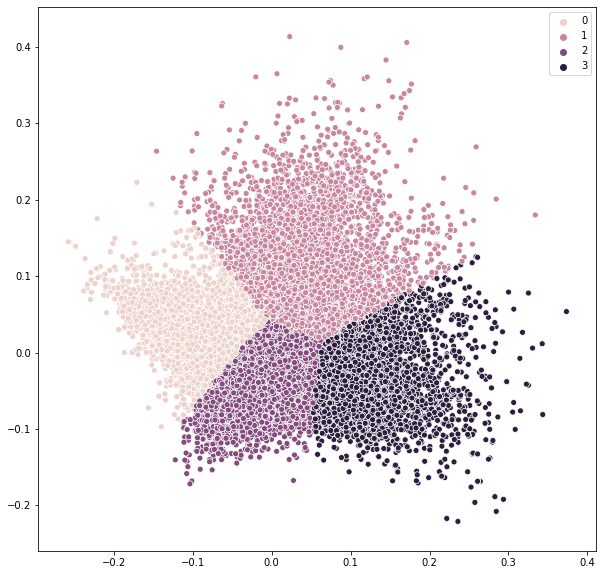

In [8]:
#reducing the basis of the dataframe by Principal Component Analysis to 2 dimensions
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(tfidf_matrix.A)

#defining kmeans class with number of clusters 4 and clutering the resultant matrix from PCA Analysis
kmeans=KMeans(n_clusters=4)
kmeans.fit(pca_matrix)

#plotting the clusters as a Scatter Plot
plt.figure(figsize=(10, 10))
sb.scatterplot(x=pca_matrix[:,0], y=pca_matrix[:,1], hue=kmeans.labels_)

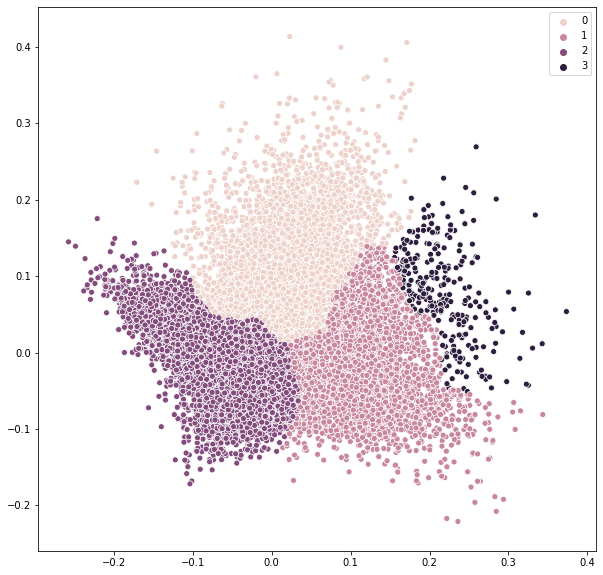

In [9]:
#creating brc class for BIRCH Clustering, defining threshold as 0.05 and number of clusters as 4
brc = Birch(threshold=0.05, n_clusters=4)

#Clustering using the resultant of PCA Analysis
brc.fit(pca_matrix)

#Creating the plot of clusters formed from Birch Algorithm
plt.figure(figsize=(10, 10))
sb.scatterplot(x=pca_matrix[:,0], y=pca_matrix[:,1], cmap = 'rainbow', hue=brc.labels_) 
plt.show()

